
# Import 

In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load Dataset

In [2]:
df = pd.read_csv('../src/data/heart-failure.csv', sep=',', index_col=False)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Function

In [3]:
def df_train(number_register):
    df_train = df.copy()
    df_train = df_train.head(number_register)
    return df_train

def df_test(number_register):
    df_test = df.copy()
    df_test = df_test.tail(number_register)
    return df_test

# Clean Data

In [5]:
# isnull()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
# change variable name to "target"
df = df.rename(columns={"DEATH_EVENT":"target"})

In [7]:
# change date type
df[['age','platelets']] = df[['age','platelets']].astype(int)

# Analize data real

In [10]:
# describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.026756,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


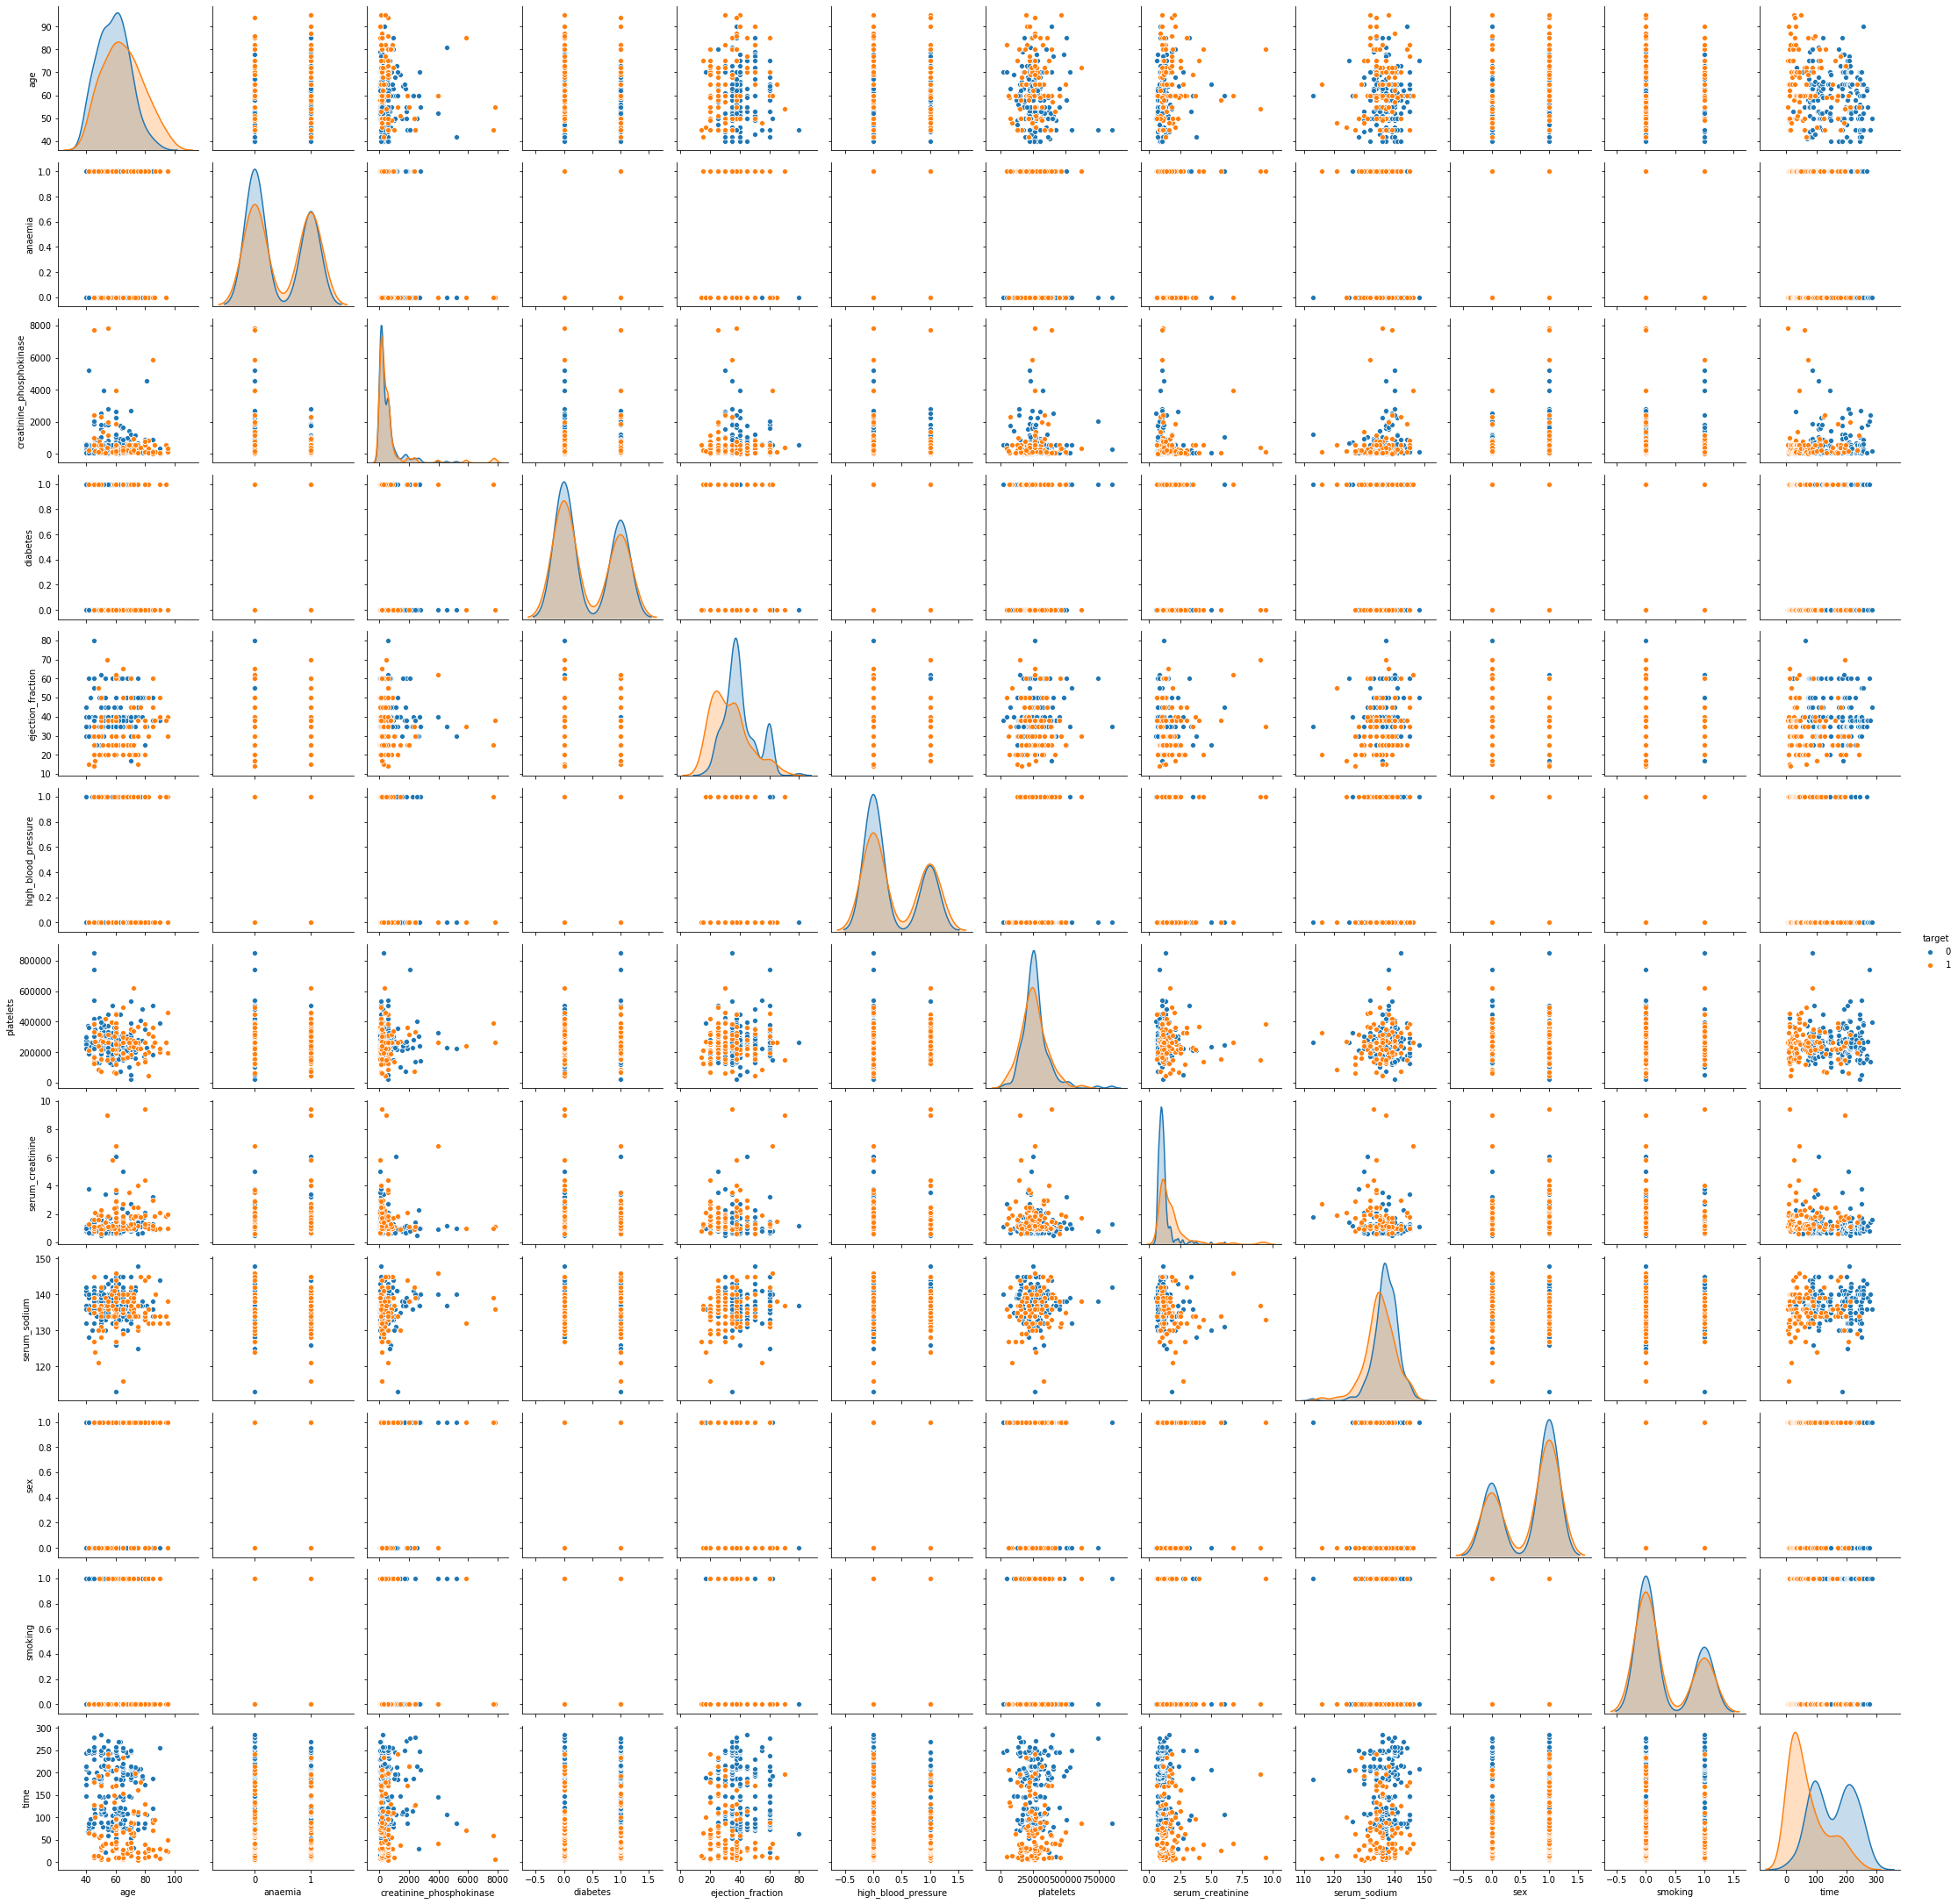

In [11]:
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()

In [12]:
df_numeric = df[['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','target']]

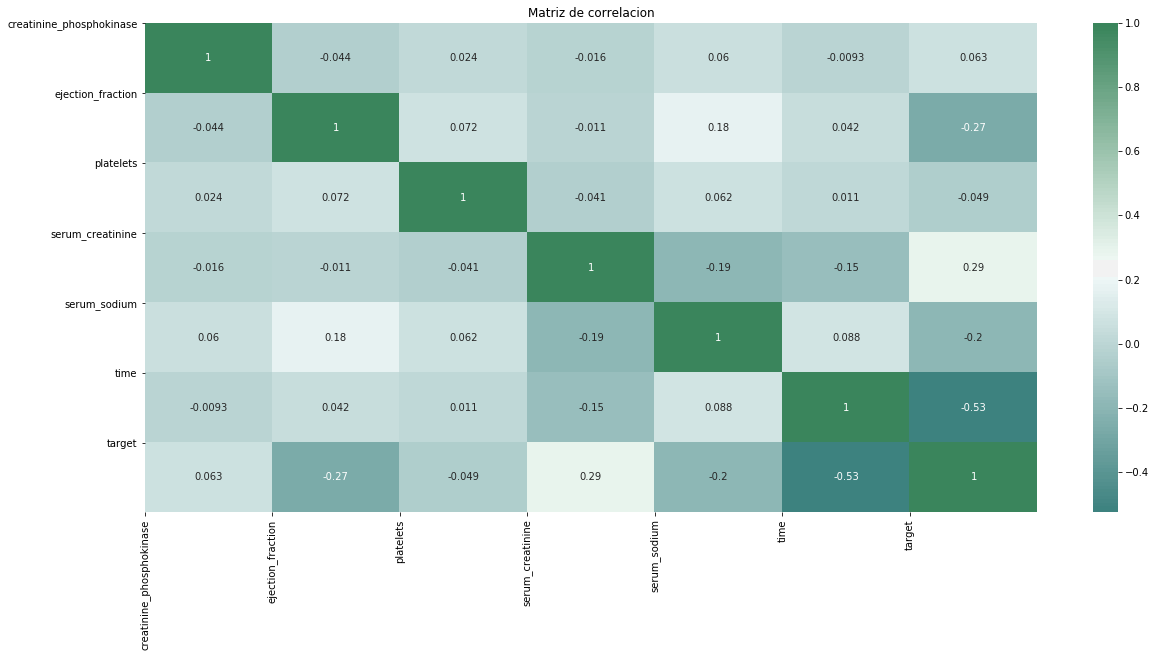

In [13]:
matriz_correlaciones = df_numeric.corr(method='pearson')
n_ticks = len(df_numeric.columns)
plt.figure(figsize=(20, 9))
sns.heatmap(matriz_correlaciones, annot=True, cmap = sns.diverging_palette(188, 143, n=143))
plt.xticks(range(n_ticks), df_numeric.columns, rotation='vertical')
plt.yticks(range(n_ticks), df_numeric.columns)
_ = plt.title('Matriz de correlacion')
plt.show()

In [14]:
# describe() independient variable
df_describe_m = df.describe().loc[['min','max']]
df_describe_m = df_describe_m[['age','ejection_fraction','serum_creatinine','anaemia','diabetes',
                           'high_blood_pressure','sex','smoking','target']]
df_describe_m

,age,ejection_fraction,serum_creatinine,anaemia,diabetes,high_blood_pressure,sex,smoking,target
min,40.0,14.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
max,95.0,80.0,9.4,1.0,1.0,1.0,1.0,1.0,1.0


# Split train - test data

In [ ]:
df_train = df_train(275)

In [ ]:
df_test = df_test(25)
df_test = df_test.drop(['time',"platelets","creatinine_phosphokinase","serum_sodium"], axis=1)